In [13]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

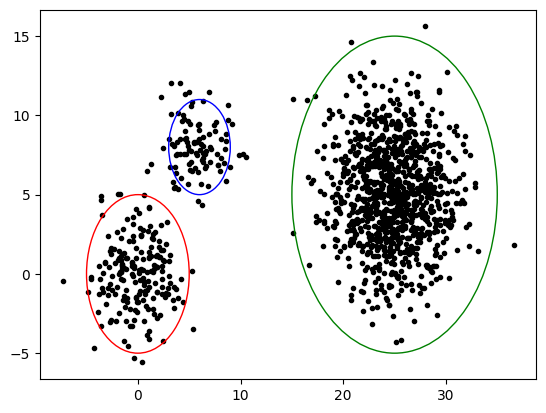

In [14]:
# Generate data from a bivariate gaussian distribution

# Mean vector
original_mu_list = [np.array([0, 0]), np.array([25, 5]), np.array([6, 8])]
# Covariance matrix
original_sigma_list = [np.array([[5, 0], [0, 5]]), np.array([[10, 0], [0, 10]]), np.array([[3, 0], [0, 3]])]
# Number of samples
n = [200, 1000, 100]

all_samples = []

for index, (mu, cov_matrix) in enumerate(zip(original_mu_list, original_sigma_list)):
    # Generate samples
    X = np.random.multivariate_normal(mu, cov_matrix, n[index])
    all_samples.append(X)
    
colors = ['r', 'g', 'b']
markers = ['.', '.', '.']

# Plot the samples
for i in range(len(all_samples)):
    plt.scatter(all_samples[i][:, 0], all_samples[i][:, 1], color='k', marker=markers[i])
for i in range(len(original_mu_list)):
    circle = plt.Circle((original_mu_list[i][0], original_mu_list[i][1]), (original_sigma_list[i][0, 0]), color=colors[i], fill=False)
    plt.gcf().gca().add_artist(circle)

plt.show()


In [15]:
from gmm import GaussianMixtureModel

# Concatenate the samples
X = np.concatenate(all_samples, axis=0)

model = GaussianMixtureModel(k=2, X=X)
iterations_data = []
num_iterations = 10

for i in tqdm(range(num_iterations)):
    model.fit()
    iterations_data.append((model.mu.copy(), model.cov_matrix.copy(), model.pi.copy()))

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:00<00:00, 24.80it/s]


In [16]:
# Plot the results
import numpy as np
from matplotlib.animation import FuncAnimation
from IPython import display
import matplotlib.pyplot as plt


def animate(frame: int):
    model.mu = iterations_data[frame][0]
    model.cov_matrix = iterations_data[frame][1]
    model.pi = iterations_data[frame][2]

    # Clear the plot
    plt.clf()
    # Plot the points
    plt.scatter(X[:, 0], X[:, 1], color='k', marker='.')
    for i in range(model.k):
        circle = plt.Circle((model.mu[i][0], model.mu[i][1]), (model.cov_matrix[i][0, 0]), color='r', fill=True, linestyle='--', alpha=model.pi[i])
        plt.gcf().gca().add_artist(circle)

fig = plt.figure()
anim = FuncAnimation(fig, animate, init_func=None, frames=num_iterations, interval=500, blit=False)
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()